In [1]:
%matplotlib inline

**IBM QISKIT CODE**

In [2]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2390d59e1f3fa170c1debe74c57a3db318c1f55da2832de10b608be7266ddc93
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


**Measurement in Different Bases – X, Y, Z**

In quantum computing, the result of a measurement depends on the **basis** in which the measurement is performed.

**What is a Basis?**

A **basis** refers to the set of vectors relative to which a qubit is measured. The most common bases are:

- **Z-basis (Computational basis)**: {|0⟩, |1⟩}
- **X-basis**: {|+⟩, |−⟩}, where |+⟩ = (|0⟩ + |1⟩)/√2 and |−⟩ = (|0⟩ − |1⟩)/√2
- **Y-basis**: {|+i⟩, |−i⟩}, where |+i⟩ = (|0⟩ + i|1⟩)/√2 and |−i⟩ = (|0⟩ − i|1⟩)/√2

**How to Perform Measurements in Different Bases?**

Since measurement in Qiskit is always done in the **Z-basis** by default, we can rotate the qubit such that measuring in Z-basis becomes equivalent to measuring in the desired basis:

- **Z-basis**: No transformation needed.
- **X-basis**: Apply a **Hadamard (H)** gate before measurement.
- **Y-basis**: Apply an **S† (S-dagger)** gate followed by a **Hadamard (H)** gate before measurement.

**Why These Gates?**

- `H` gate transforms the X-basis to Z-basis:
  - `H |+⟩ → |0⟩`
  - `H |−⟩ → |1⟩`

- `S†` then `H` maps Y-basis to Z-basis:
  - `H S† |+i⟩ → |0⟩`
  - `H S† |−i⟩ → |1⟩`

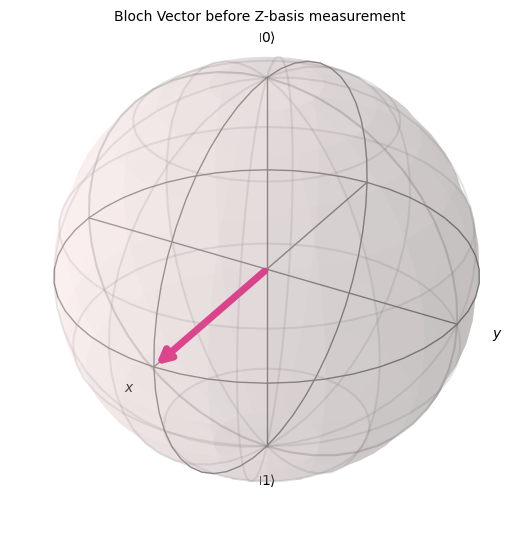

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


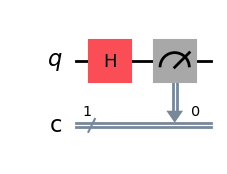

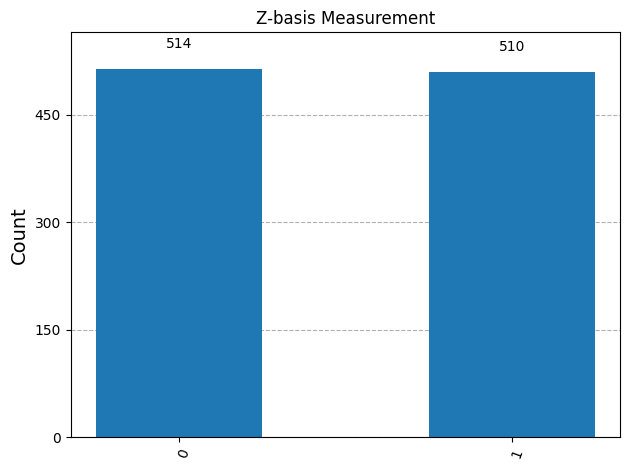

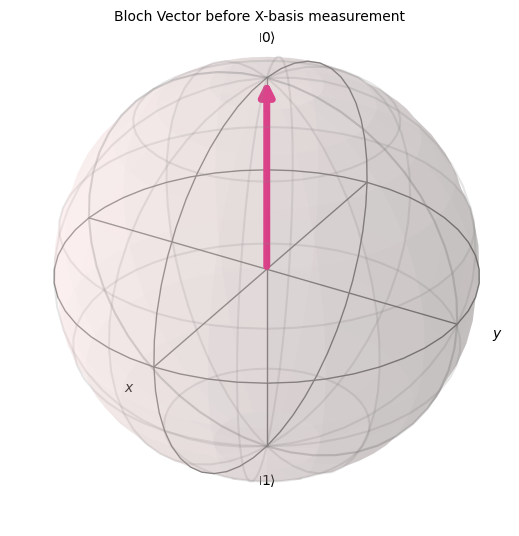

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


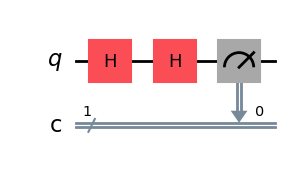

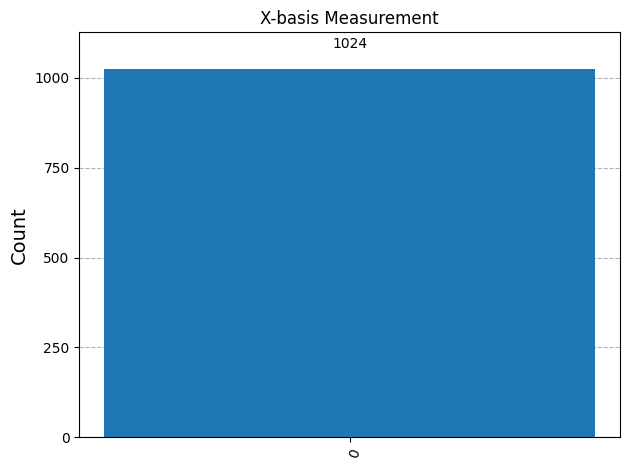

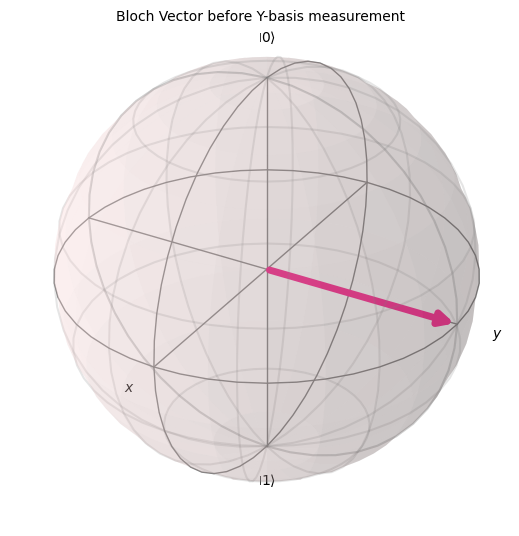

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


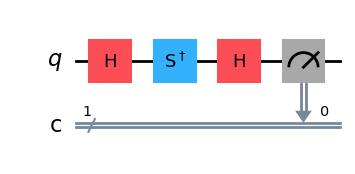

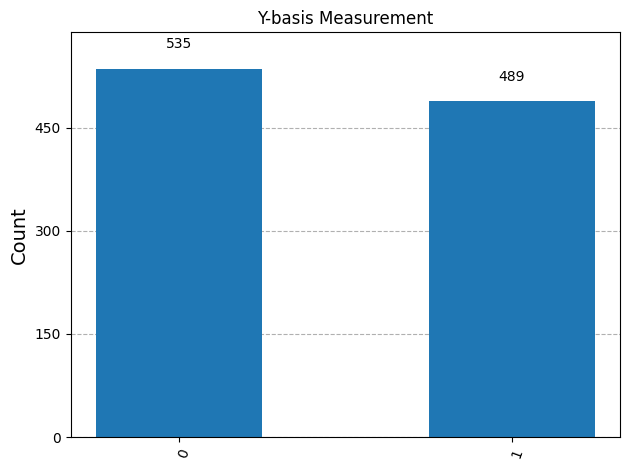

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer, plot_bloch_vector
from qiskit.quantum_info import Statevector, partial_trace
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def get_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

def measure_in_basis(basis_name):
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # prepare |+> state

    if basis_name == 'X':
        qc.h(0)  # Rotate to X basis
    elif basis_name == 'Y':
        qc.sdg(0)
        qc.h(0)  # Rotate to Y basis
    # else: Z basis (default), do nothing

    sv = Statevector.from_instruction(qc)
    rho = sv.to_operator().data
    bloch = get_bloch_vector(rho)
    display(plot_bloch_vector(bloch, title=f"Bloch Vector before {basis_name}-basis measurement"))

    qc.measure(0, 0)
    sim = AerSimulator()
    result = sim.run(qc, shots=1024).result()
    counts = result.get_counts()
    display(circuit_drawer(qc, output='mpl', style='iqx'))
    display(plot_histogram(counts, title=f"{basis_name}-basis Measurement"))
    return counts

counts_z = measure_in_basis('Z')
counts_x = measure_in_basis('X')
counts_y = measure_in_basis('Y')


**PENNYLANE CODE**

In [4]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 171.9 MB/s eta 0:00:00


In [5]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=1, shots=1000)

@qml.qnode(dev)
def measure_in_basis(basis='Z'):
    # Prepare |+⟩ state
    qml.Hadamard(wires=0)

    if basis == 'Z':
        pass  # No extra gates needed
    elif basis == 'X':
        qml.Hadamard(wires=0)
    elif basis == 'Y':
        qml.adjoint(qml.S)(0)  # Correct way to apply S†
        qml.Hadamard(wires=0)
    else:
        raise ValueError("Basis must be 'Z', 'X', or 'Y'.")

    return qml.sample(qml.PauliZ(wires=0))

for basis in ['Z', 'X', 'Y']:
    results = measure_in_basis(basis=basis)
    counts = {"+1": np.sum(results == 1), "-1": np.sum(results == -1)}
    print(f"Measurement in {basis}-basis:", counts)


Measurement in Z-basis: {'+1': np.int64(495), '-1': np.int64(505)}
Measurement in X-basis: {'+1': np.int64(1000), '-1': np.int64(0)}
Measurement in Y-basis: {'+1': np.int64(469), '-1': np.int64(531)}


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


**GOOGLE CIRQ CODE**

In [6]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 100.4 MB/s eta 0:00:00


In [7]:

import cirq
import numpy as np

# Qubit
qubit = cirq.LineQubit(0)

def measure_basis(basis='Z'):
    circuit = cirq.Circuit()

    # Prepare |+⟩ state
    circuit.append(cirq.H(qubit))

    if basis == 'Z':
        pass  # No change needed
    elif basis == 'X':
        circuit.append(cirq.H(qubit))  # X-basis: H before measure
    elif basis == 'Y':
        circuit.append(cirq.Z(qubit) ** -0.5)  # S† = Z^(-0.5)
        circuit.append(cirq.H(qubit))         # H
    else:
        raise ValueError("Basis must be 'Z', 'X', or 'Y'.")

    # Measurement
    circuit.append(cirq.measure(qubit, key='m'))

    # Simulate
    sim = cirq.Simulator()
    result = sim.run(circuit, repetitions=1000)
    counts = dict(result.histogram(key='m'))
    print(f"Measurement in {basis}-basis:", counts)

# Run for each basis
for basis in ['Z', 'X', 'Y']:
    measure_basis(basis)


Measurement in Z-basis: {0: 470, 1: 530}
Measurement in X-basis: {0: 1000}
Measurement in Y-basis: {1: 485, 0: 515}
